### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import missingno as msno
import datetime as dt
import seaborn as sns
from pywaffle import Waffle

### Importing the dataset

In [2]:
berlin = pd.read_csv("listings berlin.csv")
berlin['neighbourhood']="Berlin"
munich = pd.read_csv("listings munich.csv")
munich['neighbourhood']="Munich"
germany = pd.concat([berlin, munich])
germany.to_csv("AirBnB.csv",header=True,index=None)
germany=pd.read_csv("AirBnb.csv",low_memory=False)
germany.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20210220051856,2021-02-21,Berlin-Mitte Value! Quiet courtyard/very central,Great location! <br />30 of 75 sq meters. Thi...,It is located in the former East Berlin area o...,https://a0.muscache.com/pictures/260fd609-710a...,2217,https://www.airbnb.com/users/show/2217,...,10.0,10.0,9.0,NaN,f,6,6,0,0,2.26
1,3176,https://www.airbnb.com/rooms/3176,20210220051856,2021-02-21,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,https://a0.muscache.com/pictures/243355/84afcf...,3718,https://www.airbnb.com/users/show/3718,...,9.0,10.0,9.0,NaN,f,1,1,0,0,1.03
2,3309,https://www.airbnb.com/rooms/3309,20210220051856,2021-02-21,BerlinSpot Schöneberg near KaDeWe,First of all:<br />I prefer short-notice booki...,"My flat is in the middle of West-Berlin, direc...",https://a0.muscache.com/pictures/29054294/b1fa...,4108,https://www.airbnb.com/users/show/4108,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.29
3,6883,https://www.airbnb.com/rooms/6883,20210220051856,2021-02-21,Stylish East Side Loft in Center with AC & 2 b...,This apartment is available for people working...,The emerging and upcoming East of the new hip ...,https://a0.muscache.com/pictures/06b77d9b-4843...,16149,https://www.airbnb.com/users/show/16149,...,10.0,10.0,10.0,02/Z/RA/008250-18,f,1,1,0,0,1.01
4,7071,https://www.airbnb.com/rooms/7071,20210220051856,2021-02-21,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",https://a0.muscache.com/pictures/21278/32a1622...,17391,https://www.airbnb.com/users/show/17391,...,10.0,10.0,9.0,NaN,t,1,0,1,0,2.09


### Feature Selection

In [3]:
germany.shape

(25104, 74)

In [4]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25104 entries, 0 to 25103
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25104 non-null  int64  
 1   listing_url                                   25104 non-null  object 
 2   scrape_id                                     25104 non-null  int64  
 3   last_scraped                                  25104 non-null  object 
 4   name                                          25071 non-null  object 
 5   description                                   24324 non-null  object 
 6   neighborhood_overview                         13577 non-null  object 
 7   picture_url                                   25104 non-null  object 
 8   host_id                                       25104 non-null  int64  
 9   host_url                                      25104 non-null 

### Dropping columns that are not useful

In [5]:
germany.drop(germany.columns[[0,1,2,3,4,5,6,7,9,10,12,13,18,19,20,23,24,28,
                              29,30,34,42,43,44,45,46,47,48,49,50,51,52,54,56,57,58,59,67]], 
                             axis = 1, inplace= True)

In [6]:
#Checking if two columns have all the values equal
germany["host_listings_count"].equals(germany["host_total_listings_count"])
germany.drop(["host_total_listings_count"],axis = 1, inplace= True)

In [7]:
#duplicate_rows = germany[germany.duplicated()]
#print("number of duplicate rows: ", duplicate_rows.shape)

In [8]:
germany.isnull().sum()

host_id                                             0
host_since                                         24
host_response_time                              14518
host_response_rate                              14518
host_acceptance_rate                            11189
host_is_superhost                                  24
host_listings_count                                24
host_identity_verified                             24
neighbourhood                                       0
neighbourhood_cleansed                              0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms_text                                     45
bedrooms                                         2295
beds                                              326
amenities                                           0
price                                               0
minimum_nights              

<AxesSubplot:>

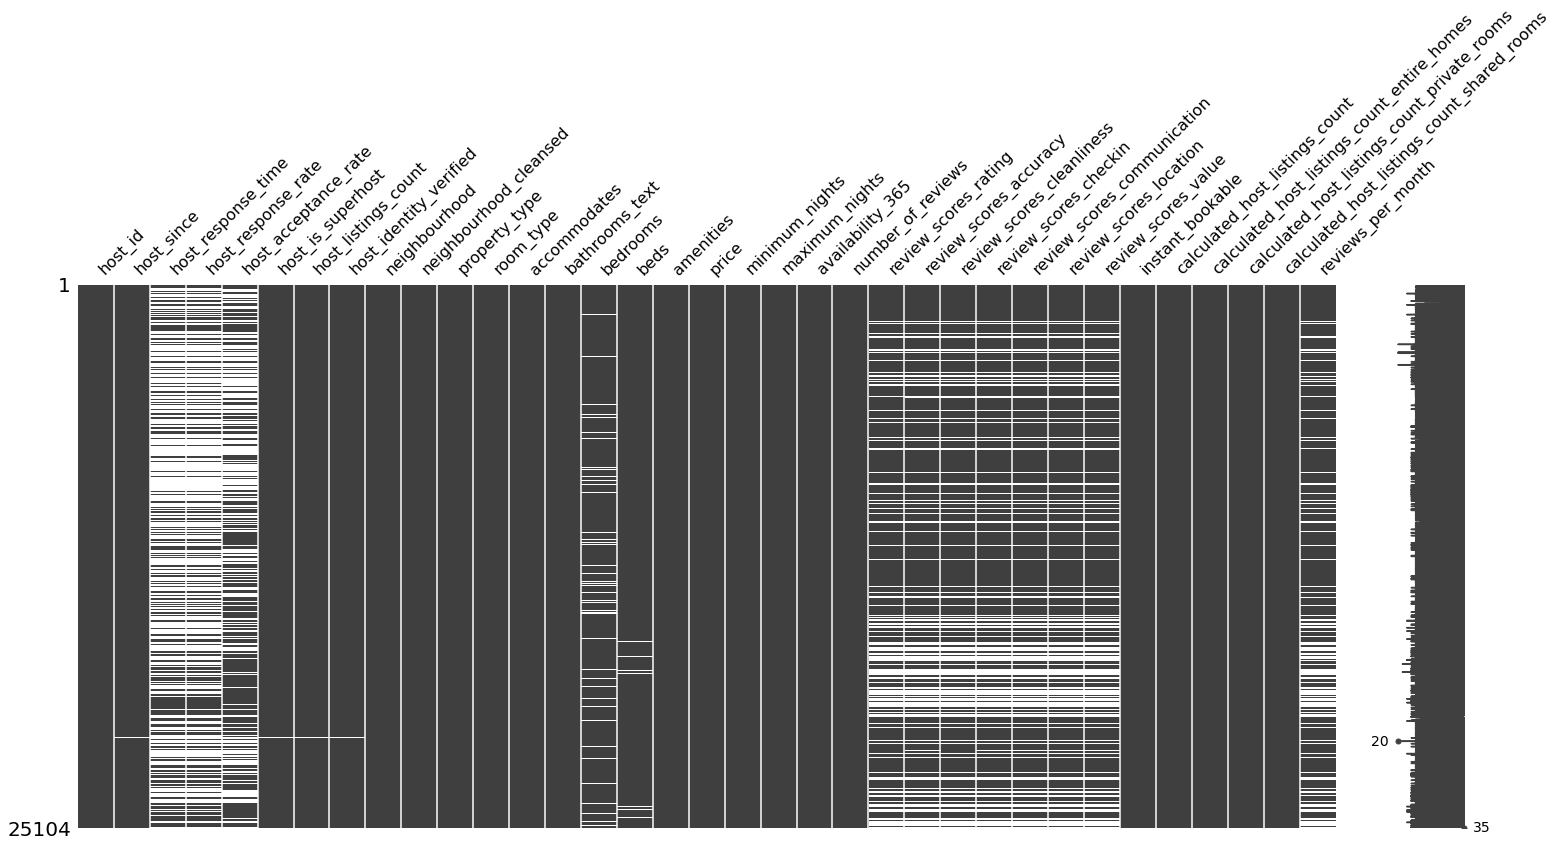

In [9]:
import missingno as msno
msno.matrix(germany)

In [10]:
germany.head()

,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2217,2008-08-18,within an hour,100%,95%,f,6.0,t,Berlin,Brunnenstr. Süd,...,10.0,10.0,10.0,9.0,f,6,6,0,0,2.26
1,3718,2008-10-19,within a day,71%,100%,f,1.0,t,Berlin,Prenzlauer Berg Südwest,...,9.0,9.0,10.0,9.0,f,1,1,0,0,1.03
2,4108,2008-11-07,NaN,NaN,NaN,f,1.0,f,Berlin,Schöneberg-Nord,...,9.0,10.0,9.0,9.0,f,1,0,1,0,0.29
3,16149,2009-05-07,within an hour,100%,100%,t,1.0,t,Berlin,Frankfurter Allee Süd FK,...,10.0,10.0,10.0,10.0,f,1,1,0,0,1.01
4,17391,2009-05-16,NaN,NaN,95%,t,2.0,t,Berlin,Helmholtzplatz,...,10.0,10.0,10.0,9.0,t,1,0,1,0,2.09


In [11]:
## after dropping few columns the shape is:
germany.shape

(25104, 35)

In [12]:
germany.columns

Index(['host_id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')

### Feature Transformation and Missing Value Imputation

In [13]:
#0 host_since
germany['host_since']

0        2008-08-18
1        2008-10-19
2        2008-11-07
3        2009-05-07
4        2009-05-16
            ...    
25099    2015-08-22
25100    2016-08-30
25101    2018-07-07
25102    2015-11-21
25103    2021-02-22
Name: host_since, Length: 25104, dtype: object

In [14]:
#0 host_since
import datetime as dt
a=pd.to_datetime(germany['host_since'])
germany['host_since']=2021-a.dt.year

In [15]:
mode_=germany["host_since"].mode()[0]
germany["host_since"].fillna(value=mode_,inplace= True)
print(germany['host_since'].describe())

count    25104.000000
mean         5.572100
std          2.482264
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         13.000000
Name: host_since, dtype: float64


In [16]:
#1 host_response_time
germany["host_response_time"].unique()

array(['within an hour', 'within a day', nan, 'within a few hours',
       'a few days or more'], dtype=object)

In [17]:
germany['host_response_time'] =germany['host_response_time'].astype('category')
germany['host_response_time'] = germany["host_response_time"].cat.codes
a=germany["host_response_time"].tolist()
b={}
for i in a:
    if i in b:
        b[i]+=1
    else:
        b[i]=0
print(b)
a = [3 if i==-1 else i for i in a] 
germany['host_response_time']=pd.Series(a)
print(germany['host_response_time'])

{3: 4244, 1: 2647, -1: 14517, 2: 2481, 0: 1210}
0        3
1        1
2        3
3        3
4        3
        ..
25099    3
25100    3
25101    3
25102    3
25103    3
Name: host_response_time, Length: 25104, dtype: int64


In [18]:
#2 host_response_rate
for i in germany['host_response_rate']:
    i=str(i)
germany['host_response_rate'].fillna(method="ffill",inplace=True)
germany['host_response_rate'].fillna(method="bfill",inplace=True)
germany['host_response_rate'] = [sub[ : -1] for sub in germany['host_response_rate']]
germany['host_response_rate'] = pd.to_numeric(germany['host_response_rate'])

In [19]:
#3 host_acceptance_rate
germany['host_acceptance_rate'].fillna(method="ffill",inplace=True)
germany['host_acceptance_rate'].fillna(method="bfill",inplace=True)
germany['host_acceptance_rate'] = [sub[ : -1] for sub in germany['host_acceptance_rate']]
germany['host_acceptance_rate'] = pd.to_numeric(germany['host_acceptance_rate'])

In [20]:
#4 host_is_superhost
germany['host_is_superhost'] =germany['host_is_superhost'].astype('category')
germany["host_is_superhost"] = germany["host_is_superhost"].cat.codes
a=germany["host_is_superhost"].tolist()
b=max(set(a), key=a.count)
a = [b if i==-1 else i for i in a] 
germany['host_is_superhost']=pd.Series(a)

In [21]:
#5 host_listings_count
germany['host_listings_count'].fillna(method="ffill",inplace=True)
germany['host_listings_count']

0        6.0
1        1.0
2        1.0
3        1.0
4        2.0
        ... 
25099    0.0
25100    1.0
25101    0.0
25102    0.0
25103    1.0
Name: host_listings_count, Length: 25104, dtype: float64

In [22]:
#6 host_identity_verified
germany['host_identity_verified'] =germany['host_identity_verified'].astype('category')
germany['host_identity_verified'] = germany['host_identity_verified'].cat.codes
a=germany['host_identity_verified'].tolist()
b=max(set(a), key=a.count)
a = [b if i==-1 else i for i in a] 
germany['host_identity_verified']=pd.Series(a)
germany['host_identity_verified']

0        1
1        1
2        0
3        1
4        1
        ..
25099    1
25100    1
25101    1
25102    0
25103    1
Name: host_identity_verified, Length: 25104, dtype: int64

In [23]:
#12 Bathroom's text
def convert(x):
    return str(x).split(" ")[0]

germany["bathrooms_text"] = germany["bathrooms_text"].apply(convert)
germany["bathrooms_text"] = germany["bathrooms_text"].replace(["Half-bath","Shared","Private","nan"],["0.5","1","1",None])
germany["bathrooms_text"].fillna(germany["bathrooms_text"].mode()[0], inplace= True)

def numerical(x):
    return float(x)

germany["bathrooms_text"] = germany["bathrooms_text"].apply(numerical)
germany.rename(columns={"bathrooms_text": "no_of_baths"}, inplace=True)

In [24]:
germany["no_of_baths"].head(20)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     2.5
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    2.5
15    2.5
16    1.0
17    1.0
18    1.0
19    1.0
Name: no_of_baths, dtype: float64

In [25]:
#13 bedrooms
germany["bedrooms"].fillna(germany["bedrooms"].mode()[0], inplace= True)

In [26]:
#14 beds
germany["beds"].fillna(germany["beds"].mode()[0], inplace= True)

In [27]:
#17 Price
def dollar(x):
    x = str(x)
    return float(x.lstrip("$").replace(",",""))

germany["price"] = germany["price"].apply(dollar)
germany["price"]

0         52.0
1         90.0
2         29.0
3         79.0
4         33.0
         ...  
25099    230.0
25100     42.0
25101     56.0
25102     30.0
25103     40.0
Name: price, Length: 25104, dtype: float64

In [28]:
#15 Amenities feature transformation

amen = {}
for i in germany["amenities"]:
    i = i.lstrip("[")
    i = i.rstrip("]")
    i = i.split(",")
    for j in i:
        j = j.strip(" ")
        j = j.strip('"')
        if j in amen:
            amen[j] += 1
        else:
            amen[j] = 1
            

new_amen = sorted(amen.items(), key = lambda kv:(kv[1], kv[0]),reverse = True)

for index,i in enumerate(new_amen):
    if i[1]<500:
        break
        
new_amen = new_amen[0:index]  
print(new_amen)

amen_df = {}
for i in new_amen:
    amen_df[i[0]] = []

amen_df["Price"] = []

def makelist(i):
    i = i.lstrip("[")
    i = i.rstrip("]")
    i = i.split(",")
    lst_ameni = []
    for j in i:
        j = j.strip(" ")
        j = j.strip('"')
        lst_ameni.append(j)
    return lst_ameni

germany["amenities"] = germany["amenities"].apply(makelist)

for i in germany["amenities"]:
    for j in amen_df:
        if j in i:
            amen_df[j].append(1)
        else:
            amen_df[j].append(0)
            

amen_df["Price"] = list(germany["price"])

amenities_df = pd.DataFrame(amen_df)

[('Wifi', 23889), ('Heating', 23745), ('Essentials', 23115), ('Kitchen', 23049), ('Washer', 19827), ('Long term stays allowed', 18866), ('Hair dryer', 18084), ('Hangers', 17486), ('Dedicated workspace', 17095), ('Hot water', 14529), ('Iron', 14478), ('Smoke alarm', 13471), ('TV', 13164), ('Shampoo', 12989), ('Dishes and silverware', 11674), ('Refrigerator', 11045), ('Cooking basics', 10430), ('Stove', 9636), ('Bed linens', 9085), ('Oven', 8496), ('Coffee maker', 8371), ('Free street parking', 6865), ('Dishwasher', 6498), ('Elevator', 6181), ('First aid kit', 5518), ('Dryer', 5435), ('Host greets you', 5426), ('Patio or balcony', 5370), ('Microwave', 5020), ('Private entrance', 4917), ('Fire extinguisher', 4913), ('Extra pillows and blankets', 4472), ('Luggage dropoff allowed', 4415), ('Lock on bedroom door', 4367), ('Cable TV', 4354), ('Carbon monoxide alarm', 4124), ('Free parking on premises', 3298), ('Paid parking off premises', 2726), ('Bathtub', 2357), ('Single level home', 2241),

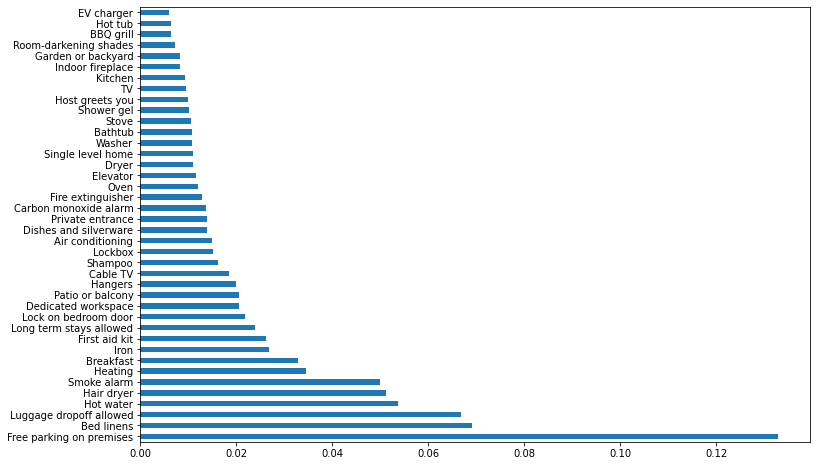

In [29]:
#Extracting only important amenities types

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(amenities_df.iloc[:,:-1], amenities_df.iloc[:,-1])

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=amenities_df.iloc[:,:-1].columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

In [30]:
#15 Inserting one hot encoded amenities types as features in main data

feat_imp = feat_importances.nlargest(15).index
germany[feat_imp] = amenities_df[feat_imp]


In [31]:
#15 Inserting a new column of total no. of amenities

def amenities_lst(i):
    i = str(i).lstrip("[")
    i = str(i).rstrip("[")
    return str(i).split(",")


germany["amenities"] = germany["amenities"].apply(amenities_lst)

def amenities_no(y):
    return len(y)

germany["_no_of_amenities"] = germany["amenities"].apply(amenities_no)
germany.drop(germany.columns[[15]],axis = 1, inplace= True)

In [32]:
#23 Review rating
mean_reviews=germany["review_scores_rating"].mean()
germany["review_scores_rating"].fillna(value=mean_reviews,inplace= True)

Text(0.5, 1.0, 'location')

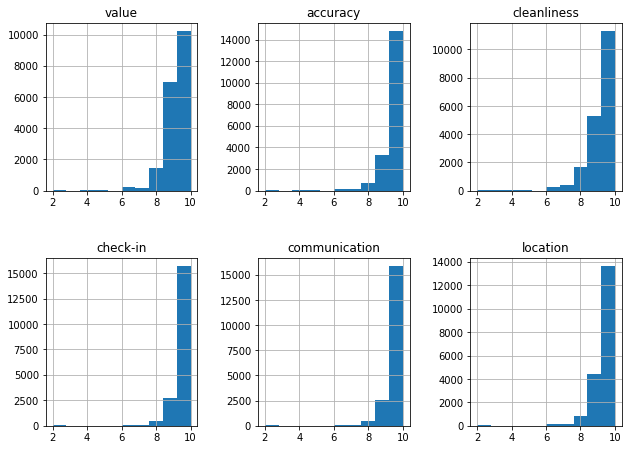

In [33]:
#Visualizing other classes of reviews
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.subplot(2,3,1)
germany["review_scores_value"].hist(bins = 10,figsize=(10,7))
plt.title("value")
plt.subplot(2,3,2)
germany["review_scores_accuracy"].hist(bins = 10,figsize=(10,7))
plt.title("accuracy")
plt.subplot(2,3,3)
germany["review_scores_cleanliness"].hist(bins = 10,figsize=(10,7))
plt.title("cleanliness")
plt.subplot(2,3,4)
germany["review_scores_checkin"].hist(bins = 10,figsize=(10,7))
plt.title("check-in")
plt.subplot(2,3,5)
germany["review_scores_communication"].hist(bins = 10,figsize=(10,7))
plt.title("communication")
plt.subplot(2,3,6)
germany["review_scores_location"].hist(bins = 10,figsize=(10,7))
plt.title("location")

In [34]:
#Filling null values of all the review columns

germany["review_scores_value"].fillna(germany["review_scores_value"].mode()[0], inplace= True)
germany["review_scores_accuracy"].fillna(germany["review_scores_accuracy"].mode()[0], inplace= True)
germany["review_scores_cleanliness"].fillna(germany["review_scores_cleanliness"].mode()[0], inplace= True)
germany["review_scores_checkin"].fillna(germany["review_scores_checkin"].mode()[0], inplace= True)
germany["review_scores_communication"].fillna(germany["review_scores_communication"].mode()[0], inplace= True)
germany["review_scores_location"].fillna(germany["review_scores_location"].mode()[0], inplace= True)
                                        


In [35]:
#30 Instantly bookable
one_hot = pd.get_dummies(germany["instant_bookable"])
germany.drop("instant_bookable", axis = "columns")
germany["Instant_bookable"]= one_hot["t"]
germany["Not_Instant_bookable"]= one_hot["f"]

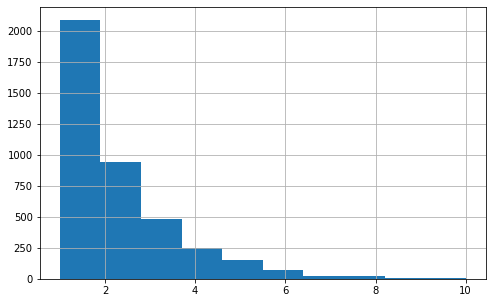

In [36]:
#35 Reviews per month
germany["reviews_per_month"].hist(bins = 10,figsize=(8,5), range=[1,10])
germany["reviews_per_month"].fillna(value=mean_reviews,inplace= True)

## Outlier detection

<AxesSubplot:xlabel='price'>

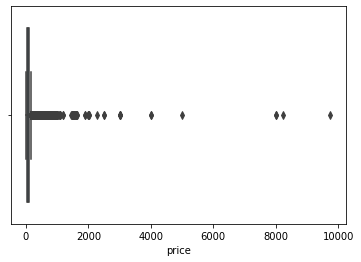

In [37]:
## Price
import seaborn as sns
sns.boxplot(x=germany['price'])

In [38]:
def remove_extreme_outlier(column):
    sorted(column)
    Q1,Q3=column.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    return lower_bound, upper_bound

<AxesSubplot:xlabel='price'>

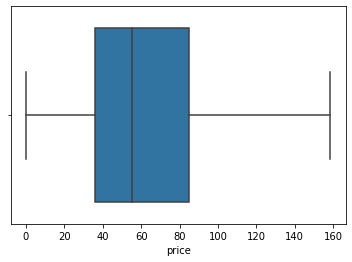

In [39]:
lower_bound,upper_bound=remove_extreme_outlier(germany['price'])
germany['price']=np.where(germany['price'] >= upper_bound,upper_bound,germany['price'])
germany['price']=np.where(germany['price'] <= lower_bound,lower_bound,germany['price'])
sns.boxplot(x=germany['price'])

In [40]:
germany.columns

Index(['host_id', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'no_of_baths', 'bedrooms',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'Free parking on premises', 'Bed linens', 'Luggage dropoff allowed',
       'Hot water', 'Hair dryer', 'Smoke alarm', 'Heat

## VISUALISATIONS

### 1) Maximum years of experience out of all hosts

6.0     4045
5.0     3522
7.0     3495
8.0     2728
4.0     2394
2.0     2344
3.0     2126
9.0     1726
1.0     1239
10.0    1133
11.0     210
0.0       88
12.0      44
13.0      10
Name: host_since, dtype: int64

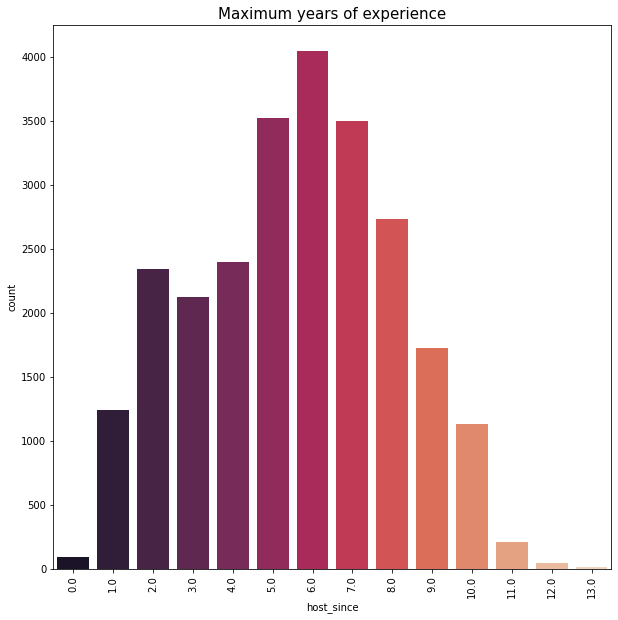

In [41]:
import seaborn as sns
plt.figure(figsize = (10,10))
ax=sns.countplot(x=germany['host_since'],palette='rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Maximum years of experience",fontsize=15)
germany['host_since'].value_counts()

### We find that there are more hosts with $6$ years of experience

### 2) People's room preference

Text(0.5, 1.0, 'Preferred room type')

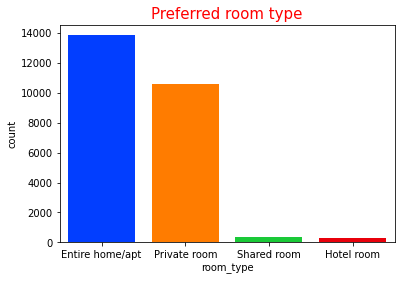

In [42]:
sns.countplot(x=germany['room_type'],palette='bright',saturation=2)
plt.title('Preferred room type',fontsize=15,color='r')

### We see that people prefer entire home/apt over other room types in Germany

### 3) Finding the maximum no. of bedrooms in all the listings

Most no. of bedrooms 1.0    20649
2.0     3297
3.0      879
4.0      184
5.0       47
Name: bedrooms, dtype: int64


<ipython-input-43-2903e4053926>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.1, j.get_height() * 1),fontsize=12,color='black')


Text(0, 0.5, 'Count')

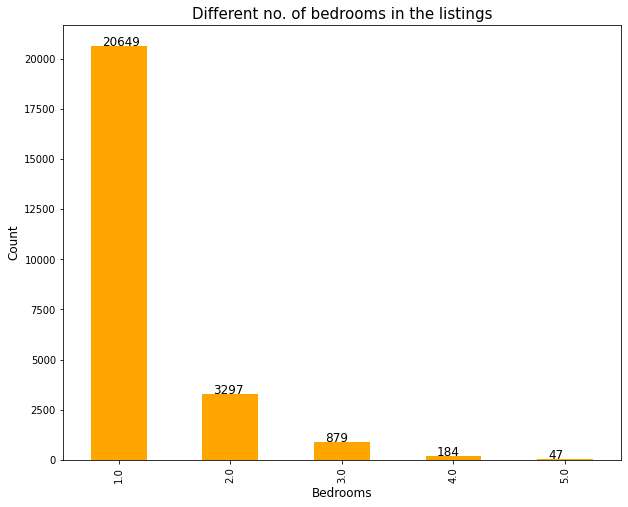

In [43]:
ax=germany['bedrooms'].value_counts().head(5).plot(kind='bar',color='orange',figsize=(10,8))
for j in ax.patches:
    ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.1, j.get_height() * 1),fontsize=12,color='black')
print('Most no. of bedrooms',germany['bedrooms'].value_counts().head(5))
plt.title('Different no. of bedrooms in the listings',fontsize=15)
plt.xlabel("Bedrooms",fontsize=12)
plt.ylabel('Count',fontsize=12)

#sns.countplot(x=germany['bedrooms'])
#print(germany['bedrooms'].value_counts().head())

Text(0, 0.5, 'Count')

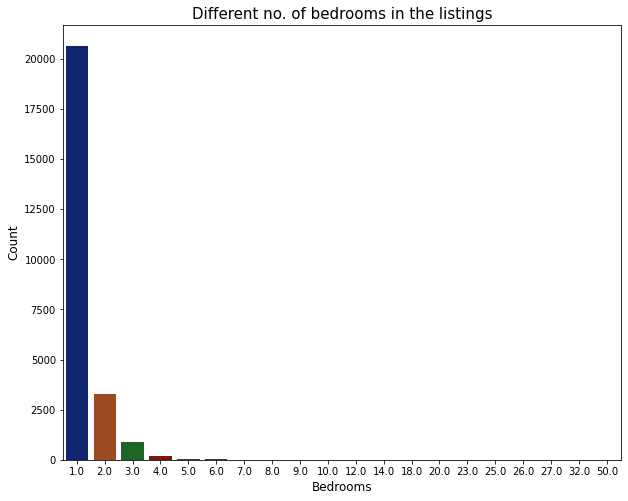

In [44]:
plt.figure(figsize=(10,8))
sns.countplot(x=germany['bedrooms'],palette='dark')
plt.title('Different no. of bedrooms in the listings',fontsize=15)
plt.xlabel("Bedrooms",fontsize=12)
plt.ylabel('Count',fontsize=12)
#print(germany['bedrooms'].value_counts().head())

###  We see that there are many listings with 1 bedroom

### 4) How many of the listings have Review ratings above $98$%?

In [45]:
review=germany[["host_id","review_scores_rating"]]
review["review_scores_rating"]=(review["review_scores_rating"].apply(lambda x: x>=98)).astype(int)
review.head(15)

<ipython-input-45-f23feecd827d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review["review_scores_rating"]=(review["review_scores_rating"].apply(lambda x: x>=98)).astype(int)


,host_id,review_scores_rating
0,2217,0
1,3718,0
2,4108,0
3,16149,1
4,17391,0
5,33852,1
6,55531,0
7,64696,0
8,68997,0
9,71331,0


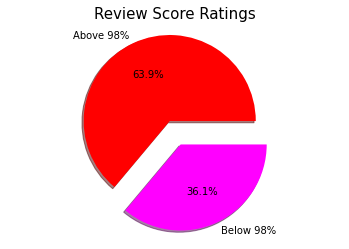

In [46]:
plt.pie(review["review_scores_rating"].value_counts(),labels=('Above 98%','Below 98%'),autopct='%1.1f%%',colors=['red','fuchsia'],explode=(0.3,0),shadow=True)
plt.title('Review Score Ratings',fontsize=15)
plt.axis('equal')
plt.show()

#### There are approximately $64$% of the total listings whose Review ratings are above $98$%

### 4) Correlation matrix between different Features

<AxesSubplot:>

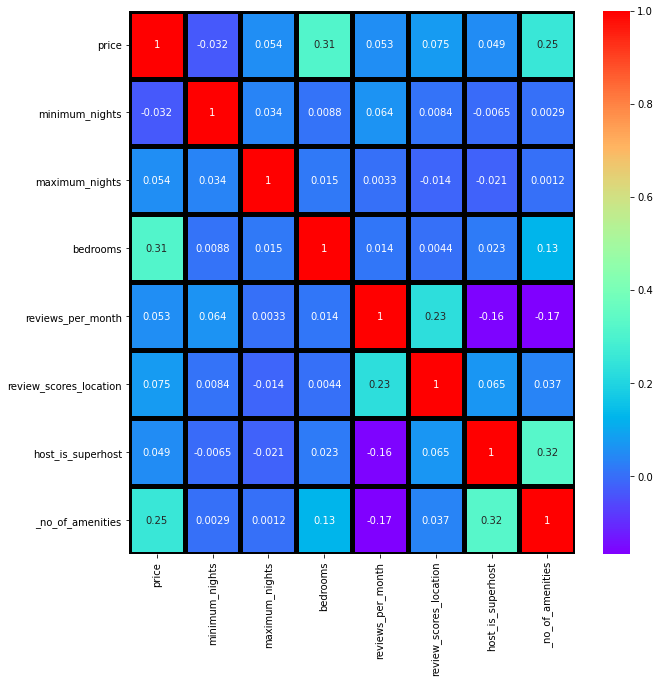

In [47]:
df1=germany[['amenities', 'price', 'minimum_nights', 'maximum_nights','bedrooms', 'reviews_per_month','property_type', 'room_type','neighbourhood','review_scores_location','neighbourhood','host_is_superhost','_no_of_amenities']]
f,ax = plt.subplots(figsize =(10,10))
sns.heatmap(df1.corr(method='pearson'), annot=True, cmap="rainbow", lw =5, linecolor='black')

##### From the above correlation matrix -
1. host is a super host and no. of amenities are higly correlated compared to others.
2. Price and bedrooms(i.e. no. of bedrooms) are also positively correlated
3. We also see that that reviews per month and the review of the location are correlated.
4. The highly negatively related are the reviews per month and the the no. of amenities.

As any two features are not highly correlated we need not drop any features.

### 5) Neighbourhood having the most listings

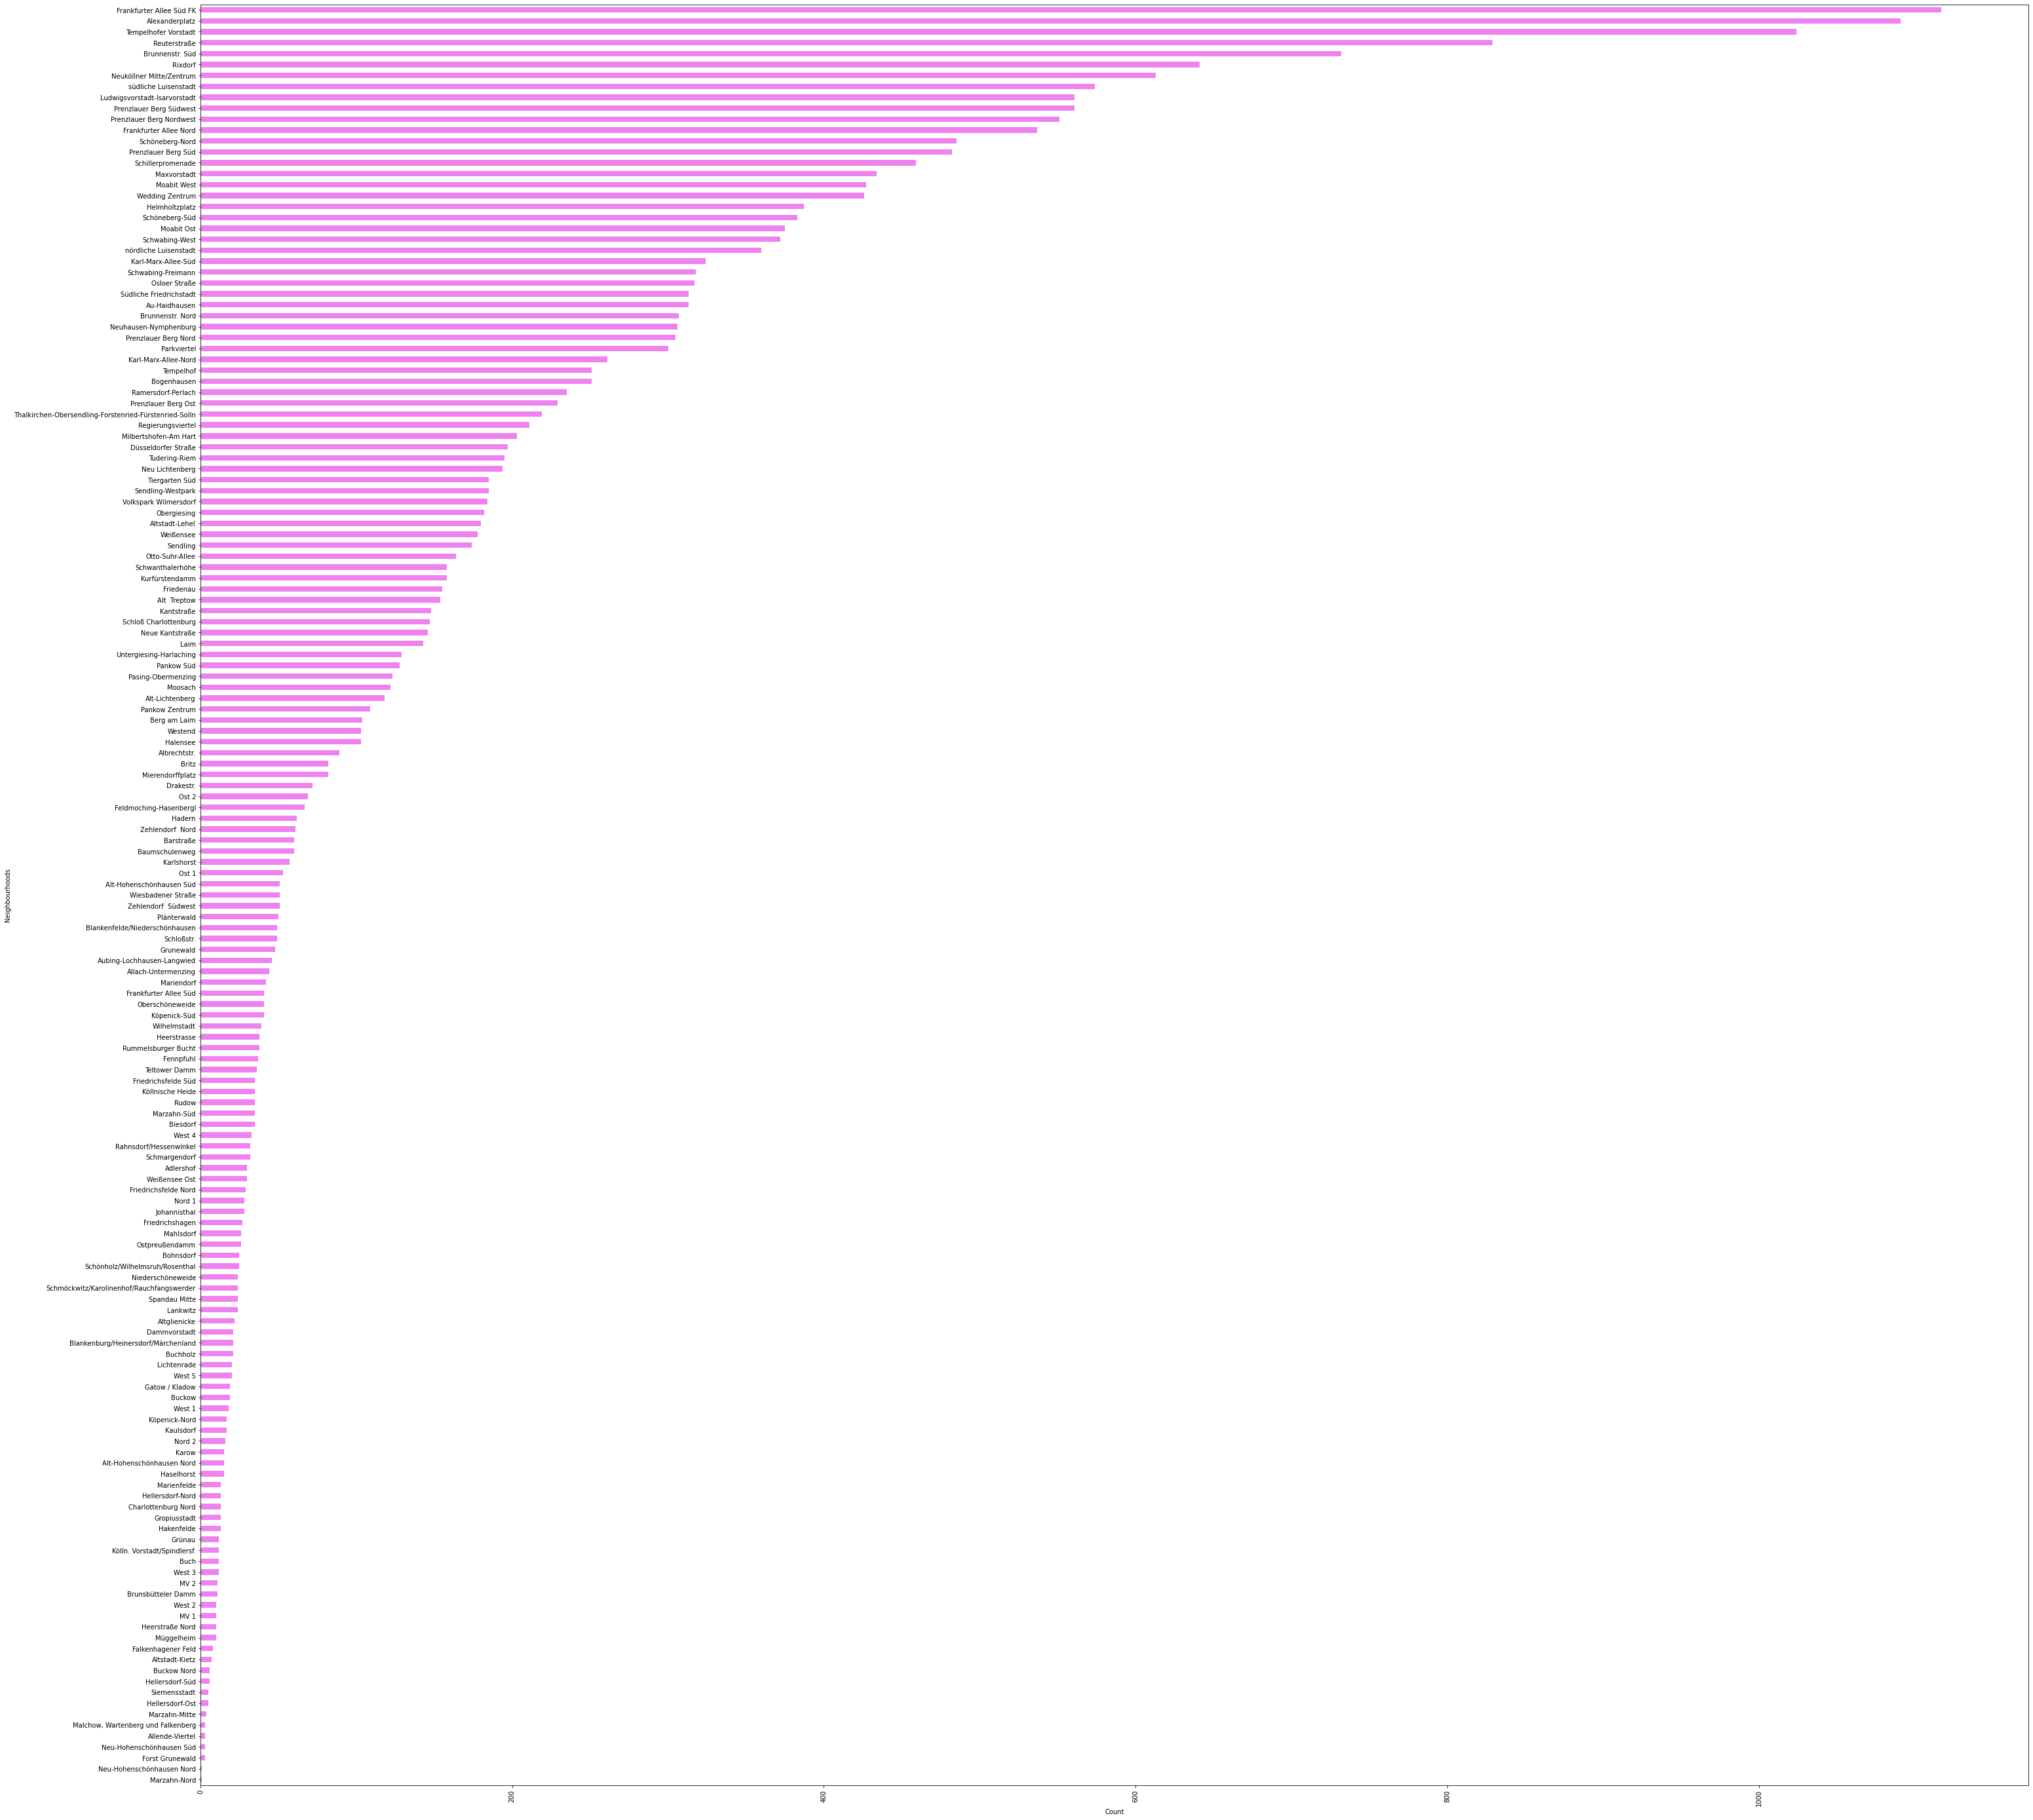

In [48]:
neighbourhood_cleansed=germany.groupby('neighbourhood_cleansed')
plt.figure(figsize=(50,50))
neighbourhood_cleansed.size().sort_values(ascending=True).plot.barh(color='violet')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Count")
plt.ylabel("Neighbourhoods")
plt.show()

TOP 5 neighbourhoods are: Frankfurter Allee Süd FK    1117
Alexanderplatz              1091
Tempelhofer Vorstadt        1024
Reuterstraße                 829
Brunnenstr. Süd              732
Name: neighbourhood_cleansed, dtype: int64


<ipython-input-49-fc9953221476>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.1, j.get_height() * 1.002),fontsize=12,color='red')


Text(0, 0.5, 'Count')

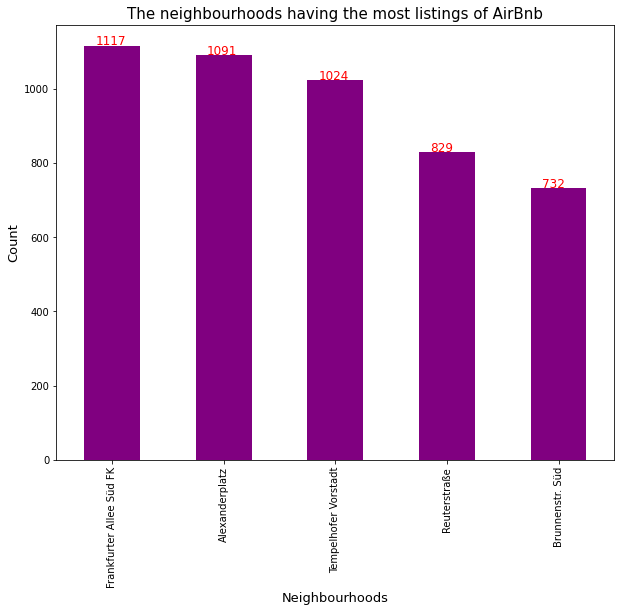

In [49]:
ax=germany['neighbourhood_cleansed'].value_counts().head(5).plot(kind='bar',color='purple',figsize=(10,8))
for j in ax.patches:
    ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.1, j.get_height() * 1.002),fontsize=12,color='red')
print('TOP 5 neighbourhoods are:',germany['neighbourhood_cleansed'].value_counts().head(5))
plt.title('The neighbourhoods having the most listings of AirBnb',fontsize=15)
plt.xlabel("Neighbourhoods",fontsize=13)
plt.ylabel('Count',fontsize=13)

Text(0, 0.5, 'Count')

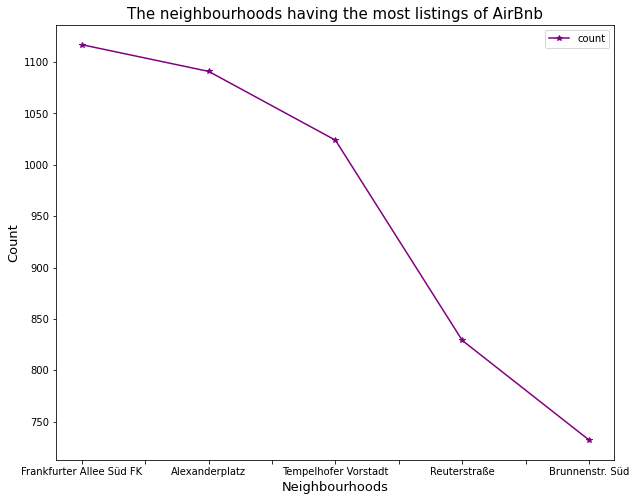

In [50]:
A=pd.Series(germany['neighbourhood_cleansed'].value_counts().head(5))
B=A.to_frame()

B.reset_index(inplace=True)

B.columns=['neighbourhood','count']

ax=B.plot.line(x='neighbourhood',y='count',color='purple',figsize=(10,8),marker='*')
ax.set_title('The neighbourhoods having the most listings of AirBnb',fontsize=15)
ax.set_xlabel("Neighbourhoods",fontsize=13)
ax.set_ylabel('Count',fontsize=13)

#### The neighbourhood "Frankfurter Allee Süd FK"  has the most no. of AirBnb listings followed by "Alexanderplatz"
 We also see that all the top 5 neighbourhoods belong to Berlin

### 6) Host Identity Verification

Text(0.5, 1.0, 'Host Identity Verification')

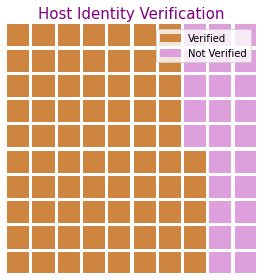

In [51]:
### Waffle chart

from pywaffle import Waffle
germany["host_identity_verified"]
fig = plt.figure(FigureClass = Waffle,rows = 10,values = germany["host_identity_verified"].value_counts(),columns=10,labels=('Verified','Not Verified'),colors=('peru','plum'))
plt.title('Host Identity Verification',fontsize=15,color='Purple')

#### 75.4% of the hosts identity is verified

### 7) Average Min. and Max. nights depending on different property types

In [53]:
data1 = pd.DataFrame(germany["property_type"].value_counts().head(10))
final_df = pd.DataFrame(columns = ['property_type', 'avg_minimum_nights', 'avg_maximum_nights'])
for i in data1.index:
    p_type = i
    min_nights = round(np.mean(germany["minimum_nights"].where(germany["property_type"] == i)))
    max_nights = round(np.mean(germany["maximum_nights"].where(germany["property_type"] == i)))
   
    final_df = final_df.append({'property_type': p_type, 'avg_minimum_nights' :min_nights, 'avg_maximum_nights' : max_nights},
                ignore_index = True)
   
print(final_df)

                 property_type avg_minimum_nights avg_maximum_nights
0             Entire apartment                 11                631
1    Private room in apartment                  5                552
2    Entire serviced apartment                  8                525
3                  Entire loft                  9                618
4        Private room in house                  4                574
5           Entire condominium                 15                591
6                Room in hotel                  2                631
7  Private room in condominium                  4                536
8                 Entire house                 12                564
9     Shared room in apartment                  8                435


<ipython-input-54-e9ce2c38064b>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center',Bbox = dict(facecolor = 'pink', alpha =1))


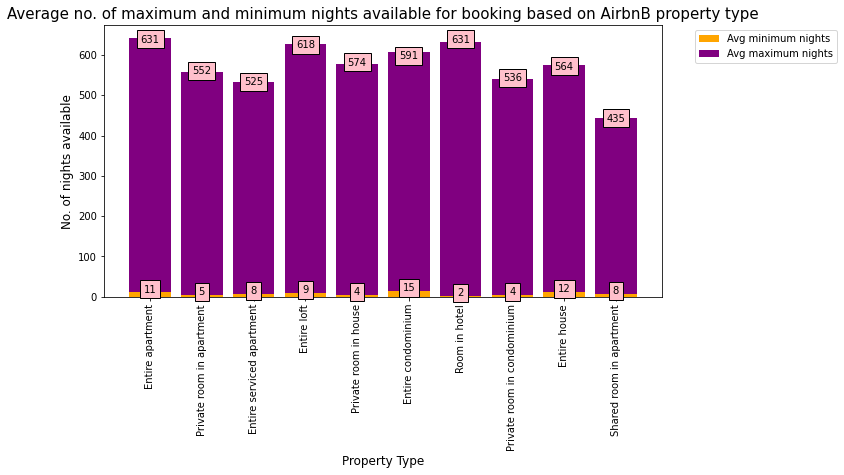

In [54]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',Bbox = dict(facecolor = 'pink', alpha =1))

 

plt.figure(figsize=(10,5))
plt.bar(final_df["property_type"],final_df["avg_minimum_nights"], color = "orange", label = "Avg minimum nights")
addlabels(final_df["property_type"],final_df["avg_minimum_nights"])
plt.bar(final_df["property_type"],final_df["avg_maximum_nights"], bottom=final_df["avg_minimum_nights"],color = "purple", 
       label = "Avg maximum nights")
addlabels(final_df["property_type"],final_df["avg_maximum_nights"])
plt.title("Average no. of maximum and minimum nights available for booking based on AirbnB property type", fontsize = 15)
plt.xlabel("Property Type", fontsize = 12)
plt.ylabel("No. of nights available", fontsize = 12)
plt.xticks(final_df["property_type"],rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### 8) Host responses to the customers

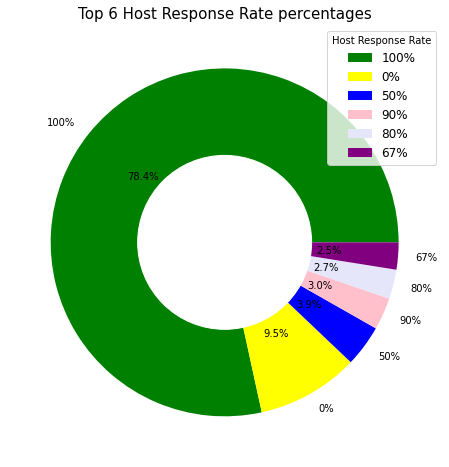

In [55]:
fig,ax=plt.subplots(figsize=(10,8))
a=ax.pie(germany['host_response_rate'].value_counts().head(6),labels=('100%','0%','50%','90%','80%','67%'),autopct='%1.1f%%',colors=('green','yellow','blue','pink','lavender','purple'))
ax.legend(title='Host Response Rate',loc='best',fontsize=12)
ax.set_title('Top 6 Host Response Rate percentages',fontsize=15)
C=plt.Circle((0,0),0.5, color='white')
p=plt.gcf()
p.gca().add_artist(C)
plt.show()

#### 78.4% of the hosts responses are 100% i.e. 78.4% of the hosts reply for all the questions/queries posted by the customers

### 9) Host Acceptance of the bookings

Text(0.5, 1.0, 'Top 5 Host Acceptance Rate percentages')

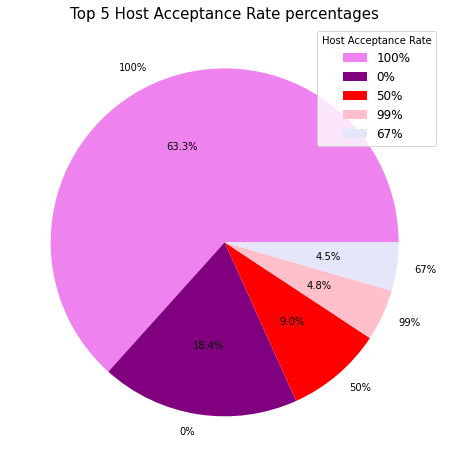

In [56]:
fig,ax=plt.subplots(figsize=(10,8))
a=ax.pie(germany['host_acceptance_rate'].value_counts().head(5),labels=('100%','0%','50%','99%','67%'),autopct='%1.1f%%',colors=('violet','purple','red','pink','lavender'))
ax.legend(title='Host Acceptance Rate',loc='best',fontsize=12)
ax.set_title('Top 5 Host Acceptance Rate percentages',fontsize=15)

#### $63.3$% of the hosts accept all the bookings done by the customer whereas $18.4$% of them don't accept all the bookings done by the customers

### 10) Instantly Vs Not Instantly bookable

In [57]:
germany['instant_bookable'].value_counts()

f    17466
t     7638
Name: instant_bookable, dtype: int64

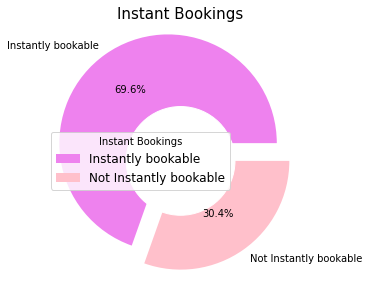

In [58]:
fig,ax=plt.subplots(figsize=(10,5))
a=ax.pie(germany['instant_bookable'].value_counts().head(5),labels=('Instantly bookable','Not Instantly bookable'),autopct='%1.1f%%',colors=('violet','pink'),explode=(0.2,0))
ax.legend(title='Instant Bookings',loc='center left',fontsize=12)
ax.set_title('Instant Bookings',fontsize=15)
C=plt.Circle((0,0),0.5, color='white')
p=plt.gcf()
p.gca().add_artist(C)
plt.show()

### 11) How long does the host take to respond to customers?

C:\Users\ACER\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-59-f8bf4f1389c0>:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.2, j.get_height() * 1),fontsize=12,color='black')


Text(0.5, 1.0, 'Host Response to the customer')

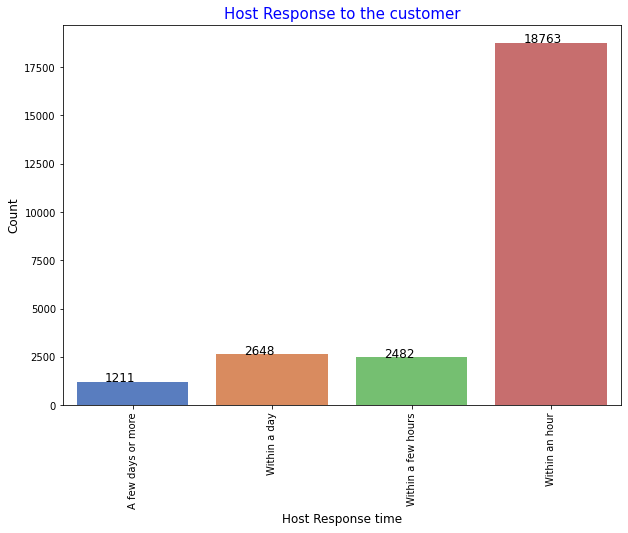

In [59]:
plt.figure(figsize=(10,7))
ax=sns.countplot(germany['host_response_time'],palette='muted')
for j in ax.patches:
    ax.annotate(s=str(j.get_height()), xy=(j.get_x()+0.2, j.get_height() * 1),fontsize=12,color='black')
    
ax.set_xticklabels(['A few days or more','Within a day', 'Within a few hours','Within an hour'],rotation=90)
ax.set_xlabel('Host Response time',fontsize=12)
ax.set_ylabel('Count',fontsize=12)
ax.set_title('Host Response to the customer',fontsize=15,color='b')


#### We see that $18,763$ of the hosts respond to customers within an hour and $2648$ of them respond within a day

### 12) Geospatial visualizations

In [60]:
# Importing the berlin csv dataset
berlin = pd.read_csv("listings berlin.csv")

# Importing geojson file of neighbourhoods of berlin
berlinmap_df = gpd.read_file('neighbourhoods_berlin.geojson')

In [61]:
# Modifying the price column

def dollar(x):
    x = str(x)
    return float(x.lstrip("$").replace(",",""))

berlin["price"] = berlin["price"].apply(dollar)


def remove_extreme_outlier(column):
    sorted(column)
    Q1,Q3=column.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    return lower_bound, upper_bound

lower_bound,upper_bound=remove_extreme_outlier(berlin['price'])
berlin['price']=np.where(berlin['price'] >= upper_bound,upper_bound,berlin['price'])
berlin['price']=np.where(berlin['price'] <= lower_bound,lower_bound,berlin['price'])

In [62]:
# Creating a dataframe of listing counts and median price by each neighbourhood
berlin_neigh_df = pd.DataFrame(berlin.groupby('neighbourhood_cleansed').size())
berlin_neigh_df.rename(columns={0: 'number_of_listings'}, inplace=True)
berlin_neigh_df['median_price'] = berlin.groupby('neighbourhood_cleansed').price.median().values

# Joining the dataframes
berlin_neigh_map_df = berlinmap_df.set_index('neighbourhood').join(berlin_neigh_df)

berlin_neigh_map_df.head()

,neighbourhood_group,geometry,number_of_listings,median_price
Adlershof,Treptow - Köpenick,"MULTIPOLYGON (((13.55429 52.42581, 13.55424 52...",30.0,41.5
Albrechtstr.,Steglitz - Zehlendorf,"MULTIPOLYGON (((13.32681 52.46139, 13.32700 52...",89.0,45.0
Alexanderplatz,Mitte,"MULTIPOLYGON (((13.40559 52.52967, 13.40721 52...",1091.0,66.0
Allende-Viertel,Treptow - Köpenick,"MULTIPOLYGON (((13.58666 52.44096, 13.58587 52...",3.0,40.0
Alt Treptow,Treptow - Köpenick,"MULTIPOLYGON (((13.43966 52.48991, 13.43967 52...",154.0,50.0


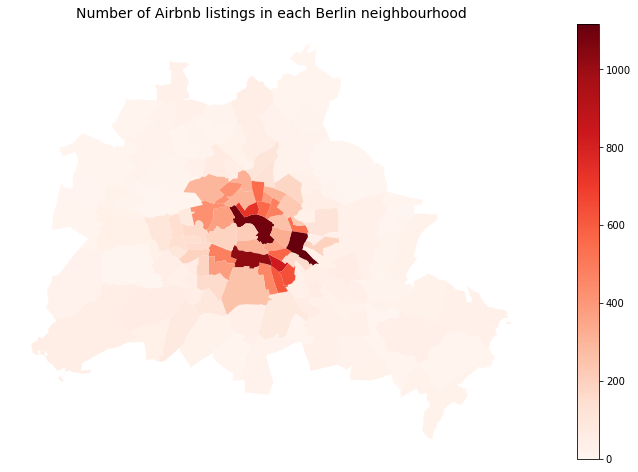

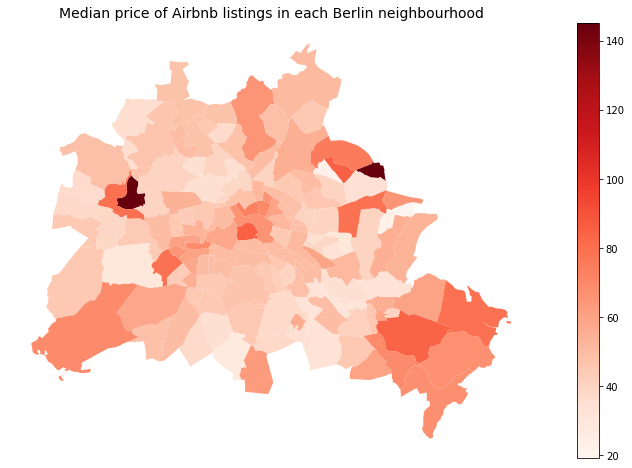

In [63]:
# Plotting the number of listings in each neighourhood
fig1, ax1 = plt.subplots(1, figsize=(15, 8))
berlin_neigh_map_df.plot(column='number_of_listings', cmap='Reds', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each Berlin neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=max(berlin_neigh_map_df.number_of_listings)))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each neighbourhood
fig2, ax2 = plt.subplots(1, figsize=(15, 8))
berlin_neigh_map_df.plot(column='median_price', cmap='Reds', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each Berlin neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(berlin_neigh_map_df.median_price), vmax=max(berlin_neigh_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

#### We can see that the majority of Airbnb listings in Berlin lie at the centre of the city. The neighbourhoods located in the centre have the greatest number of Airbnb properties. Prices are relatively lower in the densely populated areas of Airbnb listings in Berlin but our high in few surrounding areas which have lower number of listings.

In [64]:
# Importing the berlin csv dataset
munich = pd.read_csv("listings munich.csv")

# Importing geojson file of neighbourhoods of berlin
munichmap_df = gpd.read_file('neighbourhoods_munich.geojson')

In [65]:
# Modyfying the price column
munich["price"] = munich["price"].apply(dollar)

In [66]:
# Creating a dataframe of listing counts and median price by each neighbourhood
neighmun_df = pd.DataFrame(munich.groupby('neighbourhood_cleansed').size())
neighmun_df.rename(columns={0: 'number_of_listings'}, inplace=True)
neighmun_df['median_price'] = munich.groupby('neighbourhood_cleansed').price.median().values

# Joining the dataframes
neighmun_map_df = munichmap_df.set_index('neighbourhood').join(neighmun_df)

neighmun_map_df.head()

,neighbourhood_group,geometry,number_of_listings,median_price
neighbourhood,,,,
Altstadt-Lehel,None,"MULTIPOLYGON (((11.59520 48.14170, 11.59500 48...",180,112.0
Ludwigsvorstadt-Isarvorstadt,None,"MULTIPOLYGON (((11.55600 48.14080, 11.55930 48...",561,97.0
Maxvorstadt,None,"MULTIPOLYGON (((11.58430 48.14420, 11.58310 48...",434,82.0
Schwabing-West,None,"MULTIPOLYGON (((11.58170 48.17630, 11.58320 48...",372,78.5
Au-Haidhausen,None,"MULTIPOLYGON (((11.59560 48.14050, 11.59590 48...",313,79.0


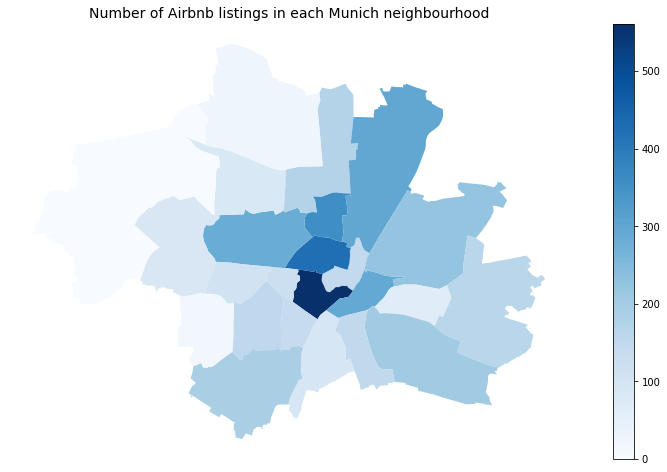

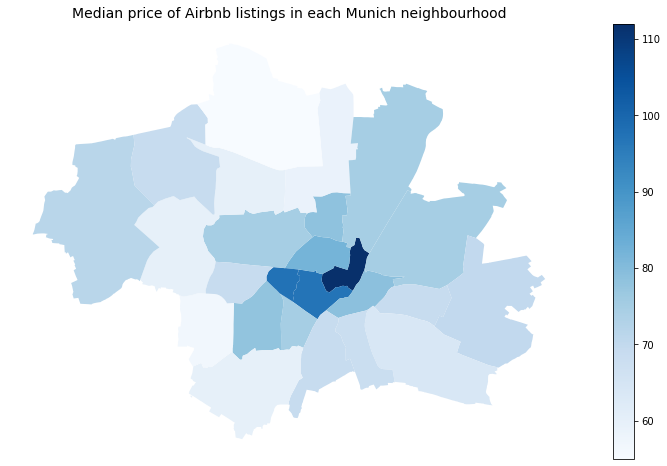

In [67]:
# Plotting the number of listings in each neighbourhood
fig3, ax3 = plt.subplots(1, figsize=(15, 8))
neighmun_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax3)
ax3.axis('off')
ax3.set_title('Number of Airbnb listings in each Munich neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=max(neighmun_map_df.number_of_listings)))
sm._A = [] # Creates an empty array for the data range
cbar = fig3.colorbar(sm)
plt.show()

# Plotting the median price of listings in each neighbourhood
fig4, ax4 = plt.subplots(1, figsize=(15, 8))
neighmun_map_df.plot(column='median_price', cmap='Blues', ax=ax4)
ax4.axis('off')
ax4.set_title('Median price of Airbnb listings in each Munich neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(neighmun_map_df.median_price), vmax=max(neighmun_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig4.colorbar(sm)
plt.show()

#### We can see that the majority of Airbnb listings in Berlin lie at the centre of the city. The neighbourhoods located in the centre have the greatest number of Airbnb properties. The most expensive areas of Airbnb listings in Munich are also located at the centre of the city. 